# Visualizing Accessibility to Urban Infrastructure

1. Visualize Distributions
2. Compare cities
3. Visualize individual categories
4. Plot bubble maps for amenities
5. Plot hex maps

In [1]:
%matplotlib inline
import glob
import geopandas as gpd
import pandas as pd
import numpy as np
import os
from scipy.stats import mstats
from shapely.geometry import Polygon
import seaborn as sns
from urban_access.data.urban_access import create_hexgrid, create_hex_access
directory = os.chdir(r'C:\Users\Leonardo\OneDrive\Documents\TU_Delft\CodingProjects\UrbanAccessibility')

In [63]:
# from shapely.geometry import box

# # define function for creating hex access (takes access points)
# def access(data):
    
#     # create bbox gdf
#     b = box(data['geometry'].total_bounds[0], data['geometry'].total_bounds[1], 
#             data['geometry'].total_bounds[2], data['geometry'].total_bounds[3])
    
#     d = {'col1': ['name1'], 'geometry': b}
#     bbox = gpd.GeoDataFrame(d, crs="EPSG:4326")
    
#     hex_res = 9
    
#     # create hexgrid
#     hexgrid = create_hexgrid(bbox.to_crs(epsg=4326), hex_res=hex_res, plot=False)
#     hexgrid.reset_index(drop=True, inplace=True)
#     hexgrid.crs = {'init': 'epsg:4326', 'no_defs': True}
    
#     # compute accessibility
#     access = create_hex_access(access = data, hexgrid = hexgrid, fillna = None, fillna_value = None)
    
#     return access

In [69]:
# files = sorted(glob.glob("data/interim/accessibility/old/pois/points_access/*_access.shp"))


# for file_path in files[15:]:
#     file_name = os.path.basename(file_path).split("_")[0]
    
#     print("Processing " + file_name + "...")
#     # 1 read the file
#     gdf = gpd.read_file(file_path)
#     print(file_name + " gdf read successfully!")
#     # 2 apply function to the file
#     access_gdf = access(data=gdf)
#     print(file_name + " access hexgrid created!")
#     # 3 export file using file name structure
#     access_gdf.to_file(f"data/interim/accessibility/new/poly/hex/{file_name}_hex_access.json", driver='GeoJSON')
    
#     print("Processed and saved " + file_name + "!")

In [34]:
# read all files 
# files = sorted(glob.glob("data/interim/accessibility/old/pois/points_access/*_access.shp"))
files = sorted(glob.glob("../UrbanAccessibility_NA/data/processed/accessibility/pois/points_access/*_access.shp"))

# files[:2]
file_names = []

for file_path in files:
    file_name = os.path.basename(file_path).split("_")[0]
    
    print("Reading " + file_name + "...")
    # 1 read the file
    exec(f'{file_name}_access = gpd.read_file(file_path)')
#     gdf = gpd.read_file(file_path)
    print(file_name + " gdf read successfully!")
    file_names.append(f'{file_name}_access')

Reading AK...
AK gdf read successfully!
Reading AM...
AM gdf read successfully!
Reading AT...
AT gdf read successfully!
Reading BA...
BA gdf read successfully!
Reading BE...
BE gdf read successfully!
Reading BG...
BG gdf read successfully!
Reading BJ...
BJ gdf read successfully!
Reading BK...
BK gdf read successfully!
Reading BUA...
BUA gdf read successfully!
Reading BU...
BU gdf read successfully!
Reading CC...
CC gdf read successfully!
Reading CE...
CE gdf read successfully!
Reading CHI...
CHI gdf read successfully!
Reading CO...
CO gdf read successfully!
Reading CP...
CP gdf read successfully!
Reading CS...
CS gdf read successfully!
Reading CTO...
CTO gdf read successfully!
Reading CT...
CT gdf read successfully!
Reading DHAG...
DHAG gdf read successfully!
Reading DU...
DU gdf read successfully!
Reading ED...
ED gdf read successfully!
Reading HCM...
HCM gdf read successfully!
Reading HOUST...
HOUST gdf read successfully!
Reading IS...
IS gdf read successfully!
Reading JK...
JK gdf r

In [35]:
# # directory = os.chdir(r'C:\Users\Leonardo\OneDrive\Documents\TU_Delft\CodingProjects\UrbanAccessibility_NA')
# # read all files 
# files2 = sorted(glob.glob("../UrbanAccessibility_NA/data/processed/accessibility/pois/points_access/*_access.shp"))
# # files[:2]
# file_names2 = []

# for file_path in files2:
#     file_name = os.path.basename(file_path).split("_")[0]
#     file_names2.append(f'{file_name}_access')
#     for file_name in file_names2:
#         if file_name not in file_names:

#             print("Reading " + file_name + "...")
#     # 1 read the file
# #     exec(f'{file_name}_access = gpd.read_file(file_path)')
# # #     gdf = gpd.read_file(file_path)
# #     print(file_name + " gdf read successfully!")

In [2]:
# load accessibility files OLD METHOD
CHI_access = gpd.read_file("data/interim/accessibility/new/poly/hex/CHI_hex_access.shp")
NYC_access = gpd.read_file("data/interim/accessibility/old/poly/hex/NYC_hex_access.shp")
SE_access = gpd.read_file("data/interim/accessibility/old/poly/hex/SE_hex_access.shp")
CV_access = gpd.read_file("data/interim/accessibility/old/poly/hex/CV_hex_access_score.shp")
CTO_access = gpd.read_file("data/interim/accessibility/old/poly/hex/CTO_hex_access_score.shp")
CM_access = gpd.read_file("data/interim/accessibility/old/poly/hex/CM_hex_access_score.shp")
CO_access = gpd.read_file("data/interim/accessibility/old/poly/hex/CO_hex_access_score.shp")
CE_access = gpd.read_file("data/interim/accessibility/old/poly/hex/CE_hex_access_score.shp")
CC_access = gpd.read_file("data/interim/accessibility/old/poly/hex/CC_hex_access_score.shp")
PS_access = gpd.read_file("data/interim/accessibility/old/poly/hex/PS_hex_access.shp")
SP_access = gpd.read_file("data/interim/accessibility/old/poly/hex/SP_hex_access.shp")
MX_access = gpd.read_file("data/interim/accessibility/old/poly/hex/MX_hex_access_score.shp")
LO_access = gpd.read_file("data/interim/accessibility/old/poly/hex/LO_hex_access_score.shp")
MEL_access = gpd.read_file("data/interim/accessibility/old/poly/hex/MEL_hex_access_score.shp")
SY_access = gpd.read_file("data/interim/accessibility/old/poly/hex/SY_hex_access_score.shp")
SG_access = gpd.read_file("data/interim/accessibility/old/poly/hex/SG_hex_access_score.shp")
BJ_access = gpd.read_file("data/interim/accessibility/old/poly/hex/BJ_hex_access_score.shp")
MA_access = gpd.read_file("data/interim/accessibility/old/poly/hex/MA_hex_access_score.shp")
MI_access = gpd.read_file("data/interim/accessibility/old/poly/hex/MI_hex_access_score.shp")
BK_access = gpd.read_file("data/interim/accessibility/old/poly/hex/BK_hex_access_score.shp")
SO_access = gpd.read_file("data/interim/accessibility/old/poly/hex/SO_hex_access_score.shp")
RO_access = gpd.read_file("data/interim/accessibility/old/poly/hex/RO_hex_access_score.shp")
TP_access = gpd.read_file("data/interim/accessibility/old/poly/hex/TP_hex_access_score.shp")
BA_access = gpd.read_file("data/interim/accessibility/old/poly/hex/BA_hex_access_score.shp")
AM_access = gpd.read_file("data/interim/accessibility/old/poly/hex/AM_hex_access_score.shp")
BUA_access = gpd.read_file("data/interim/accessibility/old/poly/hex/BUA_hex_access_score.shp")
SGO_access = gpd.read_file("data/interim/accessibility/old/poly/hex/SGO_hex_access_score.shp")
IS_access = gpd.read_file("data/interim/accessibility/old/poly/hex/IS_hex_access_score.shp")
TK_access = gpd.read_file("data/interim/accessibility/old/poly/hex/TK_hex_access_score.shp")
RIO_access = gpd.read_file("data/interim/accessibility/old/poly/hex/RIO_hex_access_score.shp")
CT_access = gpd.read_file("data/interim/accessibility/old/poly/hex/CT_hex_access_score.shp")
BE_access = gpd.read_file("data/interim/accessibility/old/poly/hex/BE_hex_access_score.shp")
NA_access = gpd.read_file("data/interim/accessibility/old/poly/hex/NA_hex_access_score.shp")
MW_access = gpd.read_file("data/interim/accessibility/old/poly/hex/MW_hex_access_score.shp")
BG_access = gpd.read_file("data/interim/accessibility/old/poly/hex/BG_hex_access_score.shp")
MLA_access = gpd.read_file("data/interim/accessibility/old/poly/hex/MLA_hex_access_score.shp")
CP_access = gpd.read_file("data/interim/accessibility/old/poly/hex/CP_hex_access_score.shp")
AT_access = gpd.read_file("data/interim/accessibility/old/poly/hex/AT_hex_access_score.shp")
BU_access = gpd.read_file("data/interim/accessibility/old/poly/hex/BU_hex_access_score.shp")
JK_access = gpd.read_file("data/interim/accessibility/old/poly/hex/JK_hex_access_score.shp")
AK_access = gpd.read_file("data/interim/accessibility/old/poly/hex/AK_hex_access_score.shp")
DU_access = gpd.read_file("data/interim/accessibility/old/poly/hex/DU_hex_access_score.shp")
WA_access = gpd.read_file("data/interim/accessibility/old/poly/hex/WA_hex_access_score.shp")
ED_access = gpd.read_file("data/interim/accessibility/old/poly/hex/ED_hex_access_score.shp")
ST_access = gpd.read_file("data/interim/accessibility/old/poly/hex/ST_hex_access_score.shp")
ZU_access = gpd.read_file("data/interim/accessibility/old/poly/hex/ZU_hex_access_score.shp")
LB_access = gpd.read_file("data/interim/accessibility/old/poly/hex/LB_hex_access_score.shp")
HCM_access = gpd.read_file("data/interim/accessibility/old/poly/hex/HCM_hex_access_score.shp")
LI_access = gpd.read_file("data/interim/accessibility/old/poly/hex/LI_hex_access_score.shp")

In [2]:
# load accessibility files NEW METHOD
# CHI_access = gpd.read_file("data/interim/accessibility/new/poly/hex/CHI_hex_access.json", driver="GeoJSON")
# NYC_access = gpd.read_file("data/interim/accessibility/new/poly/hex/NYC_hex_access.json", driver="GeoJSON")
# SE_access = gpd.read_file("data/interim/accessibility/new/poly/hex/SE_hex_access.json", driver="GeoJSON")
CV_access = gpd.read_file("data/interim/accessibility/new/poly/hex/MV_hex_access.json", driver="GeoJSON")
# CTO_access = gpd.read_file("data/interim/accessibility/new/poly/hex/MT_hex_access.json", driver="GeoJSON")
# CM_access = gpd.read_file("data/interim/accessibility/new/poly/hex/MM_hex_access.json", driver="GeoJSON")
CO_access = gpd.read_file("data/interim/accessibility/new/poly/hex/MO_hex_access.json", driver="GeoJSON")
CE_access = gpd.read_file("data/interim/accessibility/new/poly/hex/CE_hex_access.json", driver="GeoJSON")
CC_access = gpd.read_file("data/interim/accessibility/new/poly/hex/CC_hex_access.json", driver="GeoJSON")
PS_access = gpd.read_file("data/interim/accessibility/new/poly/hex/PS_hex_access.json", driver="GeoJSON")
SP_access = gpd.read_file("data/interim/accessibility/new/poly/hex/SP_hex_access.json", driver="GeoJSON")
MX_access = gpd.read_file("data/interim/accessibility/new/poly/hex/MX_hex_access.json", driver="GeoJSON")
LO_access = gpd.read_file("data/interim/accessibility/new/poly/hex/LO_hex_access.json", driver="GeoJSON")
MEL_access = gpd.read_file("data/interim/accessibility/new/poly/hex/MEL_hex_access.json", driver="GeoJSON")
SY_access = gpd.read_file("data/interim/accessibility/new/poly/hex/SY_hex_access.json", driver="GeoJSON")
SG_access = gpd.read_file("data/interim/accessibility/new/poly/hex/SG_hex_access.json", driver="GeoJSON")
BJ_access = gpd.read_file("data/interim/accessibility/new/poly/hex/BJ_hex_access.json", driver="GeoJSON")
MA_access = gpd.read_file("data/interim/accessibility/new/poly/hex/MA_hex_access.json", driver="GeoJSON")
MI_access = gpd.read_file("data/interim/accessibility/new/poly/hex/MI_hex_access.json", driver="GeoJSON")
BK_access = gpd.read_file("data/interim/accessibility/new/poly/hex/BK_hex_access.json", driver="GeoJSON")
SO_access = gpd.read_file("data/interim/accessibility/new/poly/hex/SO_hex_access.json", driver="GeoJSON")
RO_access = gpd.read_file("data/interim/accessibility/new/poly/hex/RO_hex_access.json", driver="GeoJSON")
TP_access = gpd.read_file("data/interim/accessibility/new/poly/hex/TP_hex_access.json", driver="GeoJSON")
BA_access = gpd.read_file("data/interim/accessibility/new/poly/hex/BA_hex_access.json", driver="GeoJSON")
AM_access = gpd.read_file("data/interim/accessibility/new/poly/hex/AM_hex_access.json", driver="GeoJSON")
BUA_access = gpd.read_file("data/interim/accessibility/new/poly/hex/BUA_hex_access.json", driver="GeoJSON")
SGO_access = gpd.read_file("data/interim/accessibility/new/poly/hex/SGO_hex_access.json", driver="GeoJSON")
IS_access = gpd.read_file("data/interim/accessibility/new/poly/hex/IS_hex_access.json", driver="GeoJSON")
TK_access = gpd.read_file("data/interim/accessibility/new/poly/hex/TK_hex_access.json", driver="GeoJSON")
RIO_access = gpd.read_file("data/interim/accessibility/new/poly/hex/RIO_hex_access.json", driver="GeoJSON")
CT_access = gpd.read_file("data/interim/accessibility/new/poly/hex/CT_hex_access.json", driver="GeoJSON")
BE_access = gpd.read_file("data/interim/accessibility/new/poly/hex/BE_hex_access.json", driver="GeoJSON")
NA_access = gpd.read_file("data/interim/accessibility/new/poly/hex/NA_hex_access.json", driver="GeoJSON")
MW_access = gpd.read_file("data/interim/accessibility/new/poly/hex/MW_hex_access.json", driver="GeoJSON")
BG_access = gpd.read_file("data/interim/accessibility/new/poly/hex/BG_hex_access.json", driver="GeoJSON")
MLA_access = gpd.read_file("data/interim/accessibility/new/poly/hex/MLA_hex_access.json", driver="GeoJSON")
CP_access = gpd.read_file("data/interim/accessibility/new/poly/hex/CP_hex_access.json", driver="GeoJSON")
AT_access = gpd.read_file("data/interim/accessibility/new/poly/hex/AT_hex_access.json", driver="GeoJSON")
BU_access = gpd.read_file("data/interim/accessibility/new/poly/hex/BU_hex_access.json", driver="GeoJSON")
JK_access = gpd.read_file("data/interim/accessibility/new/poly/hex/JK_hex_access.json", driver="GeoJSON")
AK_access = gpd.read_file("data/interim/accessibility/new/poly/hex/AK_hex_access.json", driver="GeoJSON")
DU_access = gpd.read_file("data/interim/accessibility/new/poly/hex/DU_hex_access.json", driver="GeoJSON")
WA_access = gpd.read_file("data/interim/accessibility/new/poly/hex/WA_hex_access.json", driver="GeoJSON")
ED_access = gpd.read_file("data/interim/accessibility/new/poly/hex/ED_hex_access.json", driver="GeoJSON")
ST_access = gpd.read_file("data/interim/accessibility/new/poly/hex/ST_hex_access.json", driver="GeoJSON")
ZU_access = gpd.read_file("data/interim/accessibility/new/poly/hex/ZU_hex_access.json", driver="GeoJSON")
LB_access = gpd.read_file("data/interim/accessibility/new/poly/hex/LB_hex_access.json", driver="GeoJSON")
HCM_access = gpd.read_file("data/interim/accessibility/new/poly/hex/HCM_hex_access.json", driver="GeoJSON")
LI_access = gpd.read_file("data/interim/accessibility/new/poly/hex/LI_hex_access.json", driver="GeoJSON")

In [3]:
DHAG_access = gpd.read_file("data/interim/accessibility/old/poly/hex/DHAG_hex_access_score.shp")

### Data Preprocessing

In [47]:
# NEW METHOD
# Graph 1

AK_access['city'] = 'Auckland'
AM_access['city'] = 'Amsterdam'
AT_access['city'] = 'Athens'
BA_access['city'] = 'Barcelona'
BE_access['city'] = 'Berlin'
BG_access['city'] = 'Bogota'
BJ_access['city'] = 'Beijing'
BK_access['city'] = 'Bangkok'
BU_access['city'] = 'Budapest'
BUA_access['city'] = 'Buenos Aires'
# CC_access
# CE_access
CHI_access['city'] = 'Chicago'
# CO_access
# CS
CP_access['city'] = 'Copenhagen'
CT_access['city'] = 'Cape Town'
CTO_access['city'] = 'Toronto'
DHAG_access['city'] = "The Hague"

DU_access['city'] = 'Dublin'
ED_access['city'] = 'Edinburgh'
HCM_access['city'] = 'Ho Chi Minh'
HOUST_access['city'] = "Houston"

IS_access['city'] = 'Istanbul'
JK_access['city'] = 'Jakarta'
LANG_access['city'] = "Los Angeles"

LB_access['city'] = 'Lisbon'
LI_access['city'] = 'Lima'
LO_access['city'] = 'London'
MA_access['city'] = 'Madrid'
# MC
# ME

CC_access['city'] = 'Calgary'
CE_access['city'] = 'Edmonton'
MEL_access['city'] = 'Melbourne'
MIAMI_access['city'] = "Miami"

MI_access['city'] = 'Milan'
MLA_access['city'] = 'Manila'
MM_access['city'] = 'Montreal'
MO_access['city'] = 'Ottawa'
# MT

MV_access['city'] = 'Vancouver'
MW_access['city'] = 'Moscow'
MX_access['city'] = 'Mexico City'
NA_access['city'] = 'Nairobi'
NTH_access['city'] = "Nottingham"

NYC_access['city'] = 'New York City'
PHILLY_access['city'] = "Philadelphia"

PS_access['city'] = 'Paris'
RIO_access['city'] = 'Rio de Janeiro'
RO_access['city'] = 'Rome'
SE_access['city'] = 'Seattle'
SF_access['city'] = 'San Francisco'

SG_access['city'] = 'Shanghai'
SGO_access['city'] = 'Santiago'
SO_access['city'] = 'Seoul'
SP_access['city'] = 'Singapore'
ST_access['city'] = 'Stockholm'
SY_access['city'] = 'Sydney'
TK_access['city'] = 'Tokyo'
TP_access['city'] = 'Taipei'
WA_access['city'] = 'Warsaw'
ZU_access['city'] = 'Zurich'

cities_ls = [AK_access, AM_access, AT_access, BA_access, BE_access, BG_access, 
             BJ_access, BK_access, BU_access, BUA_access, CHI_access, CP_access,
             CT_access, CTO_access, DU_access, DHAG_access, ED_access, HCM_access, HOUST_access, IS_access, 
             JK_access, LANG_access, LB_access, LI_access, LO_access, MA_access, CC_access, 
             CE_access, MEL_access, MI_access, MLA_access, MIAMI_access, MM_access, MO_access, 
             MV_access, MW_access, MX_access, NA_access, NTH_access, NYC_access, PS_access, PHILLY_access,
             RIO_access, RO_access, SE_access, SF_access, SG_access, SGO_access, SO_access,
             SP_access, ST_access, SY_access, TK_access, TP_access, WA_access,
             ZU_access]

# cities_ls = [CHI_access, NYC_access, SE_access, CTO_access, MV_access, MM_access, 
#              CO_access, CE_access, CC_access, PS_access, SP_access, MX_access,
#              LO_access, MEL_access, SY_access, SG_access, BJ_access, MA_access, 
#              MI_access, BK_access, SO_access, RO_access, TP_access, BA_access, 
#              AM_access, BUA_access, SGO_access, IS_access, TK_access, RIO_access, 
#              CT_access, BE_access, NA_access, MW_access, BG_access, MLA_access,
#              CP_access, AT_access, BU_access, JK_access, AK_access, DU_access,
#              WA_access, ED_access, ST_access, ZU_access, LB_access, HCM_access,
#              LI_access]

cities_pts = pd.concat(cities_ls, ignore_index=True)

In [3]:
# Graph 2
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))

# CHI_access['city'] = 'Chicago'
# NYC_access['city'] = 'New York City'
# SE_access['city'] = 'Seattle'
# CT_access['city'] = 'Toronto'
# CV_access['city'] = 'Vancouver'
# CM_access['city'] = 'Montreal'
# CC_access['city'] = 'Calgary'
# CE_access['city'] = 'Edmonton'
# CO_access['city'] = 'Ottawa'
# PS_access['city'] = 'Paris'
# SP_access['city'] = 'Singapore'
# MX_access['city'] = 'Mexico City'
# LO_access['city'] = 'London'
# MEL_access['city'] = 'Melbourne'
# SY_access['city'] = 'Sydney'
# SG_access['city'] = 'Shanghai'
# BJ_access['city'] = 'Beijing'
# MA_access['city'] = 'Madrid'
# MI_access['city'] = 'Milan'
# BK_access['city'] = 'Bangkok'
# SO_access['city'] = 'Seoul'
# RO_access['city'] = 'Rome'
# TP_access['city'] = 'Taipei'
# BA_access['city'] = 'Barcelona'
# AM_access['city'] = 'Amsterdam'
# BUA_access['city'] = 'Buenos Aires'
# SGO_access['city'] = 'Santiago'
# IS_access['city'] = 'Istanbul'
# TK_access['city'] = 'Tokyo'
# RIO_access['city'] = 'Rio de Janeiro'
# CT_access['city'] = 'Cape Town'
# BE_access['city'] = 'Berlin'
# NA_access['city'] = 'Nairobi'
# MW_access['city'] = 'Moscow'
# BG_access['city'] = 'Bogota'
# MLA_access['city'] = 'Manila'
# CP_access['city'] = 'Copenhagen'
# AT_access['city'] = 'Athens'
# BU_access['city'] = 'Budapest'
# JK_access['city'] = 'Jakarta'
# AK_access['city'] = 'Auckland'
# DU_access['city'] = 'Dublin'
# WA_access['city'] = 'Warsaw'
# ED_access['city'] = 'Edinburgh'
# ST_access['city'] = 'Stockholm'
# ZU_access['city'] = 'Zurich'
# LB_access['city'] = 'Lisbon'
# HCM_access['city'] = 'Ho Chi Minh'
# LI_access['city'] = 'Lima'


# cities_ls = [CHI_access, NYC_access, SE_access, CT_access, CV_access, CM_access, 
#              CO_access, CE_access, CC_access, PS_access, SP_access, MX_access,
#              LO_access, MEL_access, SY_access, SG_access, BJ_access, MA_access, 
#              MI_access, BK_access, SO_access, RO_access, TP_access, BA_access, 
#              AM_access, BUA_access, SGO_access, IS_access, TK_access, RIO_access, 
#              CT_access, BE_access, NA_access, MW_access, BG_access, MLA_access,
#              CP_access, AT_access, BU_access, JK_access, AK_access, DU_access,
#              WA_access, ED_access, ST_access, ZU_access, LB_access, HCM_access,
#              LI_access]

# #compute accessibility
# for i in range(0,len(cities_ls)):

#     cities_ls[i]['accessibil'] =  (0.2*(cities_ls[i]['mobility']) + 
#                                    0.1*(cities_ls[i]['active_liv']) + 
#                                    0.1*(cities_ls[i]['nightlife']) + 
#                                    0.15*(cities_ls[i]['food_choic']) + 
#                                    0.1*(cities_ls[i]['community_']) + 
#                                    0.15*(cities_ls[i]['education']) + 
#                                    0.2*(cities_ls[i]['health_wel']))
#     #Normalize the data
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     cities_ls[i]['accessibil'] = scaler.fit_transform(cities_ls[i][['accessibil']])
#     cities_ls[i]['accessibil_sc'] = 1 - scaler.fit_transform(cities_ls[i][['accessibil']])
    
# ## Use this for Zipf's law later
# # create rank for every city: rank each block by accessibility from 1 to ...
# # rank for accessibility
# for i in range(0,len(cities_ls)):
#     cities_ls[i] = cities_ls[i].sort_values('accessibil', ascending=False)
#     cities_ls[i]['rank_a'] = np.arange(1, len(cities_ls[i])+1, 1)
#     cities_ls[i]['rank_a'] = scaler.fit_transform(cities_ls[i][['rank_a']])
    
# # categories rescaled
# for i in range(0,len(cities_ls)):
#     cities_ls[i]['mobility_r'] = scaler.fit_transform(cities_ls[i][['mobility']])
#     cities_ls[i]['active_liv_r'] = scaler.fit_transform(cities_ls[i][['active_liv']])
#     cities_ls[i]['nightlife_r'] = scaler.fit_transform(cities_ls[i][['nightlife']])
#     cities_ls[i]['food_choic_r'] = scaler.fit_transform(cities_ls[i][['food_choic']])
#     cities_ls[i]['community_r'] = scaler.fit_transform(cities_ls[i][['community_']])
#     cities_ls[i]['education_r'] = scaler.fit_transform(cities_ls[i][['education']])
#     cities_ls[i]['health_wel_r'] = scaler.fit_transform(cities_ls[i][['health_wel']])

# # rank for mobility
# for i in range(0,len(cities_ls)):
#     cities_ls[i] = cities_ls[i].sort_values('mobility_r', ascending=False)
#     cities_ls[i]['rank_m'] = np.arange(1, len(cities_ls[i])+1, 1)
#     cities_ls[i]['rank_m'] = scaler.fit_transform(cities_ls[i][['rank_m']])

# # rank for active living
# for i in range(0,len(cities_ls)):
#     cities_ls[i] = cities_ls[i].sort_values('active_liv_r', ascending=False)
#     cities_ls[i]['rank_al'] = np.arange(1, len(cities_ls[i])+1, 1)
#     cities_ls[i]['rank_al'] = scaler.fit_transform(cities_ls[i][['rank_al']])

# # rank for nightlife
# for i in range(0,len(cities_ls)):
#     cities_ls[i] = cities_ls[i].sort_values('nightlife_r', ascending=False)
#     cities_ls[i]['rank_n'] = np.arange(1, len(cities_ls[i])+1, 1)
#     cities_ls[i]['rank_n'] = scaler.fit_transform(cities_ls[i][['rank_n']])
    
# # rank for food choices
# for i in range(0,len(cities_ls)):
#     cities_ls[i] = cities_ls[i].sort_values('food_choic_r', ascending=False)
#     cities_ls[i]['rank_fc'] = np.arange(1, len(cities_ls[i])+1, 1)
#     cities_ls[i]['rank_fc'] = scaler.fit_transform(cities_ls[i][['rank_fc']])
    
# # rank for community space
# for i in range(0,len(cities_ls)):
#     cities_ls[i] = cities_ls[i].sort_values('community_r', ascending=False)
#     cities_ls[i]['rank_cs'] = np.arange(1, len(cities_ls[i])+1, 1)
#     cities_ls[i]['rank_cs'] = scaler.fit_transform(cities_ls[i][['rank_cs']])
    
# # rank for education
# for i in range(0,len(cities_ls)):
#     cities_ls[i] = cities_ls[i].sort_values('education_r', ascending=False)
#     cities_ls[i]['rank_e'] = np.arange(1, len(cities_ls[i])+1, 1)
#     cities_ls[i]['rank_e'] = scaler.fit_transform(cities_ls[i][['rank_e']])
    
# # rank for health and wellbeing
# for i in range(0,len(cities_ls)):
#     cities_ls[i] = cities_ls[i].sort_values('health_wel_r', ascending=False)
#     cities_ls[i]['rank_hwb'] = np.arange(1, len(cities_ls[i])+1, 1)
#     cities_ls[i]['rank_hwb'] = scaler.fit_transform(cities_ls[i][['rank_hwb']])


# cities = pd.concat(cities_ls, ignore_index=True)
# cities = cities[['mobility_r', 'active_liv_r', 'nightlife_r', 'food_choic_r', 
#                  'community_r', 'education_r', 'health_wel_r', 'accessibil', 
#                  'accessibil_sc','city', 'rank_a', 'rank_m', 'rank_al', 'rank_n', 
#                  'rank_fc','rank_cs', 'rank_e', 'rank_hwb']]

In [160]:
# sorted(cities_pts.city.unique())

In [161]:
# CTO_access.crs

In [35]:
# worldpop = worldpop.set_crs("EPSG:54009")

In [50]:
worldpop = gpd.read_file('data/raw/world/GHS_POP_GPW42015_GLOBE_R2015A_54009_250_v1_0/ghs_2015_250_clipped_s_new_wgs84.shp')
# worldpop.crs = cities_pts.crs
worldpop = worldpop[worldpop['POP_2015']>=0]
# worldpop = worldpop.to_crs(cities_pts.crs)

In [51]:
def create_hex_access(access = None, hexgrid = None, fillna = None, fillna_value = None):
    
    '''Computes average accessibility per hexagon by taking the average of walking distances within each hexagon
        
    Args: 
        access (GeoDataFrame) : Point GeoDataFrame with distance values.
        hexgrid : hexagon grid
    
    Returns:
        gdf (GeoDataFrame) : Hexagon grid GeoDataFrame with averaged distance values for each category of amenities.

    '''
    
    #join transit access points to census
    hexgrid = hexgrid.reset_index()
    hex_access = gpd.sjoin(hexgrid, access, how='left')


    hex_access['index'] = hex_access['index'] 
    hex_access = hex_access.groupby(by = ['index', 'city']).mean().reset_index()
#     hex_access = hex_access[["mobility", "active_living", "nightlife", "food_choices",
#                                    "community_space", "education", "health_wellbeing"]]
    
    #hex_access = hex_access.fillna(method = 'ffill')
    if fillna_value == None:
        if fillna == None:
            hex_access = hex_access.dropna()
        elif fillna != None:
            hex_access = hex_access.fillna(method = fillna)
    else:
#         hex_access = hex_access.fillna(hex_access.max(), downcast='infer')
        hex_access = hex_access.fillna(value = fillna_value)
#         hex_access = hex_access.fillna(method = 'ffill')

    hex_access_f = hexgrid.merge(hex_access, on='index').drop('index_right',axis=1)
    
    
    return hex_access_f

In [32]:
# hexgrid = worldpop.reset_index()
# hex_access = gpd.sjoin(hexgrid, cities_pts, how='left')
# hex_access['index'] = hex_access['index'] 
# hex_access = hex_access.groupby(by = ['index', 'city']).mean().reset_index()
# # hex_access = hexgrid.merge(hex_access, on='index')
# # hex_access = hex_access.drop('index_right',axis=1)

In [33]:
# cities = hexgrid.merge(hex_access, on='index').drop(['index_right', 'POP_2015_x', 'index', 'osmid'],axis=1)

In [34]:
# cities.city.unique()

In [55]:
### Interpolate into population grid
cities = create_hex_access(access = cities_pts, hexgrid = worldpop, fillna = None, fillna_value = None)
cities = cities.drop(['POP_2015_x', 'index', 'osmid'],axis=1)

In [56]:
cities

,geometry,city,POP_2015_y,active_liv,community_,education,food_choic,health_wel,mobility,nightlife,y,x
0,"POLYGON ((-3.35280 55.99953, -3.35294 56.00204...",Edinburgh,0.000000,2289.251465,3126.523987,2997.960999,2502.432007,3126.523987,2592.153992,2562.057007,56.000383,-3.351069
1,"POLYGON ((-3.36702 55.99702, -3.36716 55.99953...",Edinburgh,0.000000,1548.709961,2154.115967,2025.552979,1530.024048,2154.115967,1619.745972,1589.649048,55.997986,-3.365603
2,"POLYGON ((-3.36688 55.99450, -3.36702 55.99702...",Edinburgh,0.000000,1407.715942,2013.121948,1884.558960,1389.030029,2013.121948,1478.751953,1448.655029,55.996857,-3.366635
3,"POLYGON ((-3.35970 55.99450, -3.35984 55.99702...",Edinburgh,0.000000,1719.728027,2737.893066,2370.750000,1993.432983,2737.893066,1964.942993,1731.087036,55.995372,-3.356359
4,"POLYGON ((-3.35611 55.99450, -3.35625 55.99702...",Edinburgh,0.000000,1679.390991,2957.992920,2590.850098,2213.532959,2957.992920,2185.042969,1951.187012,55.995295,-3.352823
...,...,...,...,...,...,...,...,...,...,...,...,...
397232,"POLYGON ((174.73420 -37.26314, 174.73101 -37.2...",Auckland,82.459290,680.900024,1880.293945,1094.577026,1533.171997,1533.171997,1174.426025,1389.233032,-37.262348,174.735773
397233,"POLYGON ((174.73707 -37.26314, 174.73388 -37.2...",Auckland,74.132019,532.829498,1732.223511,946.506500,1385.101501,1385.101501,1026.355530,1241.162537,-37.261123,174.735118
397234,"POLYGON ((174.74314 -37.26535, 174.73995 -37.2...",Auckland,0.000000,1421.012939,2620.406982,1834.689941,2273.284912,2273.284912,1914.538940,2129.345947,-37.264180,174.743810
397235,"POLYGON ((174.65660 -37.28299, 174.65340 -37.2...",Auckland,0.052929,7118.282959,7118.282959,7118.282959,119.882999,6958.424072,7016.075928,7604.299072,-37.282294,174.657903


In [71]:
cities_pts.to_file('data/interim/accessibility/new/pois/points_access/cities_final.json', index=False, driver = 'GeoJSON')

In [67]:
len(sorted(cities_pts['city'].unique()))

56

In [92]:
len(sorted(cities['city'].unique()))

54

In [78]:
# cities_pts[cities_pts['city']=='Toronto']

In [70]:
cities[cities['city']=='Toronto']

,geometry,city,POP_2015_y,active_liv,community_,education,food_choic,health_wel,mobility,nightlife,y,x


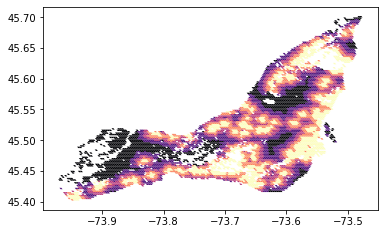

In [79]:
cities[cities['city']=='Montreal'].plot(column='mobility', cmap='magma_r', scheme='quantiles')

C:\Users\Leonardo\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


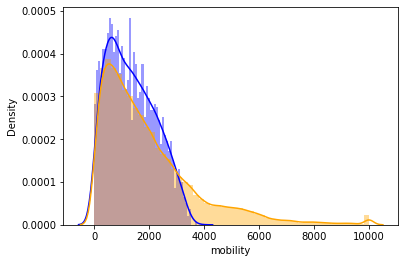

In [173]:
%matplotlib inline
import seaborn as sns
sns.distplot(cities['mobility'][cities['city']=='Vancouver'], bins=50, color='blue')
sns.distplot(cities_pts['mobility'][cities_pts['city']=='Vancouver'], bins=50, color='orange')

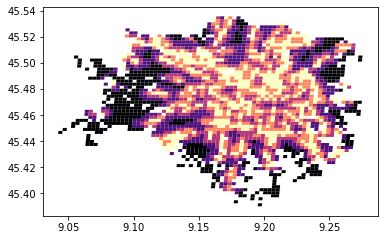

In [176]:
cities[cities['city']=='Milan'].plot(column='mobility', cmap='magma_r', scheme='quantiles')

In [72]:
cities.to_file('data/interim/accessibility/new/poly/hex/cities_final_popgrid2.json', index=False, driver = 'GeoJSON')

# START HERE

In [80]:
import warnings
import scipy
warnings.filterwarnings('ignore')
sc = "MinMaxScaler" # "StandardScaler"
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

if sc == "MinMaxScaler":
    scaler = MinMaxScaler(feature_range=(0,1))
    
if sc == "StandardScaler":
    scaler = StandardScaler()
    
# initialize empty columns
cities['pop_r'] = np.NaN
cities['accessibil'] = np.NaN
cities['accessibil_sc'] = np.NaN
cities['accessibil_sc_popw'] = np.NaN
cities['accessibil_sc_popw_r'] = np.NaN
cities['accessibil_cap'] = np.NaN
cities['pop_%'] = np.NaN
cities['ccdf'] = np.NaN
cities['ccdf_access'] = np.NaN
#compute accessibility
for i in cities['city'].unique():
    # rescaled pop
    cities['pop_r'][cities['city']==i] = scaler.fit_transform(cities[['POP_2015_y']][cities['city']==i]).flatten() 
    # access score
    cities['accessibil'][cities['city']==i] = (0.2*(cities[['mobility']][cities['city']==i].values) + 
                                               0.1*(cities[['active_liv']][cities['city']==i].values) + 
                                               0.1*(cities[['nightlife']][cities['city']==i].values) + 
                                               0.15*(cities[['food_choic']][cities['city']==i].values) + 
                                               0.1*(cities[['community_']][cities['city']==i].values) + 
                                               0.15*(cities[['education']][cities['city']==i].values) + 
                                               0.2*(cities[['health_wel']][cities['city']==i].values)).flatten()
    #Normalize the data
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     cities_ls[i]['accessibil'] = scaler.fit_transform(cities_ls[i][['accessibil']])
    cities['accessibil_cap'][cities['city']==i] = (cities[['accessibil']][cities['city']==i].values).flatten()/(cities[['POP_2015_y']][cities['city']==i].values).flatten()
    cities['accessibil_sc'][cities['city']==i] = 1 - scaler.fit_transform(cities[['accessibil']][cities['city']==i]).flatten()
    cities['accessibil_sc_popw'][cities['city']==i] = ((cities[['accessibil']][cities['city']==i].values).flatten() * (1-cities['pop_r'][cities['city']==i].values).flatten())
#     cities['accessibil_sc_popw_r'][cities['city']==i] = 1 - scaler.fit_transform(cities[['accessibil_sc_popw']][cities['city']==i]).flatten()

    # percent pop
    cities['pop_%'][cities['city']==i] = (cities[['POP_2015_y']][cities['city']==i].values).flatten()/np.sum(cities[['POP_2015_y']][cities['city']==i]).values[0]
    # ccdf of accessibility
    # REMOVE ccdf_access
    mu=cities[cities['city']==i].accessibil_sc.mean()
    sig=cities[cities['city']==i].accessibil_sc.std()
    # cities['z'][cities['city']==i]=scipy.stats.mstats.zscore(df.accessibil_sc)
    cities['ccdf_access'][cities['city']==i]=cities[cities['city']==i].sort_values('accessibil_sc')['accessibil_sc'].apply(lambda x: scipy.stats.norm(mu,sig).cdf(x))


    cities['accessibil_sc_popw_r'][cities['city']==i] = (cities['accessibil_sc'][cities['city']==i].values*cities['pop_r'][cities['city']==i].values).flatten()

#     cities_ls[i]['accessibil_wz'] = 1 - scaler.fit_transform(mstats.winsorize(cities_ls[i][['accessibil']], axis= 0, limits = [0.01,0.01]))

In [70]:
i = cities['city'].unique()[0]
1-scaler.fit_transform(np.log1p((cities[['accessibil']][cities['city']==i].values)))

array([[0.11649154],
       [0.22821619],
       [0.24968406],
       ...,
       [0.15264532],
       [0.12445293],
       [0.02637789]])

In [153]:
np.log(0.9+1)

0.6418538861723947

In [142]:
np.log(cities[['accessibil']][cities['city']=="Seattle"].values)

array([[8.04477727],
       [7.83515428],
       [7.72943934],
       ...,
       [7.79463241],
       [7.73577484],
       [7.71648034]])

In [82]:
cities = cities[(cities['ccdf']!=0)&(cities['ccdf_access']!=0)&(cities['accessibil_sc']!=0)&(cities['accessibil']!=0)]

In [26]:
import scipy
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# cities['a_log'] = np.NaN
# cities['p_log'] = np.NaN
cities['ccdfa_log'] = np.NaN
cities['ccdfp_log'] = np.NaN
cities['ccdf'] = np.NaN
cities['ccdf_access'] = np.NaN
# cities['rank_a'] = np.NaN
# cities['rank_a_log'] = np.NaN

for i in cities['city'].unique():

#     cities['a_log'][cities['city']==i] = np.log(cities[['accessibil']][cities['city']==i].values).flatten()

    cities['a_log'][cities['city']==i] = 1 - scaler.fit_transform(np.log(cities[['accessibil']][cities['city']==i].values)).flatten()
    
    cities = cities.sort_values(by = ["city", 'a_log'], ascending=False)
    cities['rank_a'][cities['city']==i] = np.arange(1, len(cities[cities['city']==i])+1, 1)
    cities['rank_a_log'][cities['city']==i] = scaler.fit_transform(np.log(cities[['rank_a']][cities['city']==i].values)).flatten()
# #     cities['a_log'][cities['city']==i] = np.log(cities[['accessibil_sc']][cities['city']==i].values).flatten()

     # cumsum of pop_%
    cities['ccdf'][cities['city']==i] = cities.sort_values('a_log')['pop_%'][cities['city']==i].cumsum()
    
cities = cities[cities['ccdf']!=0]

for i in cities['city'].unique():
    cities['ccdfp_log'][cities['city']==i] = scaler.fit_transform(np.log(cities[['ccdf']][cities['city']==i].values)).flatten()
        
    mu=cities[cities['city']==i].a_log.mean()
    sig=cities[cities['city']==i].a_log.std()
    
    cities['ccdf_access'][cities['city']==i] = cities[cities['city']==i].sort_values('a_log')['a_log'].apply(lambda x: scipy.stats.norm(mu,sig).cdf(x))

cities = cities[cities['ccdf_access']!=0]

for i in cities['city'].unique():
    cities['ccdfa_log'][cities['city']==i] = scaler.fit_transform(np.log(cities[['ccdf_access']][cities['city']==i].values)).flatten()

    
#     cities_ls[i]['rank_a_log'] = np.log(cities_ls[i][['rank_a']])
#     cities_ls[i]['rank_a_r'] = scaler.fit_transform(cities_ls[i][['rank_a']])

In [102]:
for i in cities['city'].unique():    
#     cities[cities['city']==i] = cities[cities['city']==i].sort_values('a_log', ascending=False)
#     cities['rank_a'][cities['city']==i] = np.arange(1, len(cities[cities['city']==i])+1, 1)
#     cities['rank_a_log'][cities['city']==i] = scaler.fit_transform(np.log(cities[['rank_a']][cities['city']==i].values)).flatten()

    cities = cities.sort_values(by = ["city", 'a_log'], ascending=False)
    cities['rank_a'][cities['city']==i] = np.arange(1, len(cities[cities['city']==i])+1, 1)
    cities['rank_a_log'][cities['city']==i] = scaler.fit_transform(np.log(cities[['rank_a']][cities['city']==i].values)).flatten()
    
#     cities_ls[i] = cities_ls[i].sort_values('accessibil_sc', ascending=True)
#     cities_ls[i]['rank_a'] = np.arange(1, len(cities_ls[i])+1, 1)
#     cities_ls[i]['rank_a_log'] = scaler.fit_transform(np.log(cities_ls[i][['rank_a']]))

In [ ]:
len(cities[cities['city']==i])

In [97]:
tokyo = cities[cities['city']=="Tokyo"].sort_values('a_log', ascending=False)
tokyo['rank_a'] = np.arange(1, len(tokyo)+1, 1)
tokyo['rank_a_r'] = scaler.fit_transform(tokyo[['rank_a']].values).flatten()

ottawa = cities[cities['city']=="Ottawa"].sort_values('a_log', ascending=False)
ottawa['rank_a'] = np.arange(1, len(ottawa)+1, 1)
ottawa['rank_a_r'] = scaler.fit_transform(ottawa[['rank_a']].values).flatten()

In [27]:
cities.head(2)

,city,POP_2015_y,active_liv,community_,education,food_choic,health_wel,mobility,nightlife,y,...,pop_%,ccdf,ccdf_access,a_log,ccdfa_log,ccdfp_log,rank_a,rank_a_log,Continent,geometry
0,Zurich,468.351227,63.053286,86.134357,50.645381,55.759666,123.876309,64.805548,70.472857,47.386764,...,0.001189,0.998999,0.993441,1.000000,1.000000,1.000000,1.0,0.000000,Europe,"POLYGON ((8.52792 47.38557, 8.52816 47.38791, ..."
1,Zurich,489.092712,76.890100,120.004829,130.543286,54.991929,88.553486,57.419628,63.030514,47.370499,...,0.001242,0.997810,0.990736,0.974186,0.999427,0.999843,2.0,0.095902,Europe,"POLYGON ((8.54851 47.36917, 8.54875 47.37152, ..."


In [112]:
# assign continents
north_america = ['Chicago', 'New York City', 'Seattle', 'Toronto', 'Montreal', 'Vancouver', 'Montreal', 'Calgary', 'Ottawa', 'Edmonton', 
                 "Houston", "Philadelphia", "San Francisco", "Los Angeles", "Miami"]
asia = ['Singapore', 'Shanghai', 'Beijing', 'Bangkok', 'Seoul', 'Taipei', 'Istanbul', 'Tokyo', 'Moscow', 'Manila', 'Jakarta', 'Ho Chi Minh']
africa = ['Cape Town', 'Nairobi']
europe = ['Paris', 'London', 'Madrid', 'Milan', 'Rome', 'Barcelona', 'Amsterdam', 'Berlin', 'Copenhagen', 'Athens', 'Budapest', 'Zurich',
          'Stockholm', 'Edinburgh', 'Lisbon', 'Warsaw', 'Dublin', "The Hague", "Nottingham"]
latin_america =[ 'Mexico City', 'Buenos Aires', 'Santiago', 'Rio de Janeiro', 'Bogota', 'Lima']
oceania = ['Melbourne', 'Sydney', 'Auckland']

cities['Continent'] = ""
cities['Continent'][cities['city'].isin(north_america)] = 'North America'
cities['Continent'][cities['city'].isin(asia)] = 'Asia'
cities['Continent'][cities['city'].isin(europe)] = 'Europe'
cities['Continent'][cities['city'].isin(latin_america)] = 'Latin America'
cities['Continent'][cities['city'].isin(oceania)] = 'Oceania'     
cities['Continent'][cities['city'].isin(africa)] = 'Africa'    

In [181]:
# import scipy
# cities['ccdf'] = np.NaN
# cities['ccdf_access'] = np.NaN
# for i in cities['city'].unique():
#     cities['ccdf'][cities['city']==i] = cities.sort_values('accessibil_sc')['pop_%'][cities['city']==i].cumsum()
#     mu=cities[cities['city']==i].accessibil_sc.mean()
#     sig=cities[cities['city']==i].accessibil_sc.std()
# #     cities['z'][cities['city']==i]=scipy.stats.mstats.zscore(df.accessibil_sc)
#     cities['ccdf_access'][cities['city']==i]=cities[cities['city']==i].sort_values('accessibil_sc')['accessibil_sc'].apply(lambda x: scipy.stats.norm(mu,sig).cdf(x))

# #     cities['pop_%'][cities['city']==i] = (cities[['POP_2015_y']][cities['city']==i].values).flatten()/np.sum(cities[['POP_2015_y']][cities['city']==i]).values[0]

In [182]:
# cities['ccdf'][cities['city']=='Chicago'].describe()

In [35]:
cities.to_file('data/interim/accessibility/new/poly/hex/cities_final_popgrid.json', index=False, driver = 'GeoJSON')

In [2]:
cities = gpd.read_file('data/interim/accessibility/new/poly/hex/cities_final_popgrid.json', index=False, driver = 'GeoJSON')

In [11]:
cities.head()

,city,POP_2015_y,active_liv,community_,education,food_choic,health_wel,mobility,nightlife,y,...,pop_%,ccdf,ccdf_access,a_log,ccdfa_log,ccdfp_log,rank_a,rank_a_log,Continent,geometry
0,Zurich,468.351227,63.053286,86.134357,50.645381,55.759666,123.876309,64.805548,70.472857,47.386764,...,0.001189,1.000000,0.877474,1.000000,0.993441,1.000000,1.0,0.000000,Europe,"POLYGON ((8.52792 47.38557, 8.52816 47.38791, ..."
1,Zurich,489.092712,76.890100,120.004829,130.543286,54.991929,88.553486,57.419628,63.030514,47.370499,...,0.001242,0.998811,0.874236,0.974186,0.990736,0.999817,2.0,0.095902,Europe,"POLYGON ((8.54851 47.36917, 8.54875 47.37152, ..."
2,Zurich,319.946716,52.465406,83.130423,153.086765,75.713407,75.096422,56.953453,115.623984,47.365169,...,0.000812,0.997569,0.872973,0.964843,0.989540,0.999626,3.0,0.152001,Europe,"POLYGON ((8.52895 47.36449, 8.52919 47.36683, ..."
3,Zurich,489.092712,82.481237,135.023609,107.392900,35.986227,87.228009,95.130309,79.947509,47.384331,...,0.001242,0.996756,0.872133,0.958841,0.988703,0.999501,4.0,0.191804,Europe,"POLYGON ((8.53086 47.38322, 8.53110 47.38557, ..."
4,Zurich,489.092712,84.515859,181.791408,159.842563,45.763986,59.456929,62.186662,113.795423,47.367602,...,0.001242,0.995515,0.869665,0.942049,0.986043,0.999309,5.0,0.222678,Europe,"POLYGON ((8.54509 47.36683, 8.54533 47.36917, ..."


C:\Users\Leonardo\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Leonardo\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


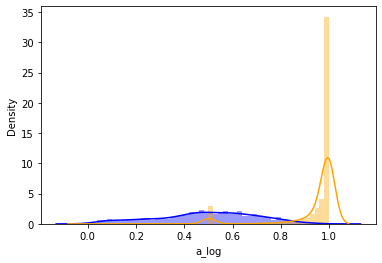

In [51]:
%matplotlib inline
import seaborn as sns
sns.distplot(cities['a_log'][cities['city']=='Amsterdam'], bins=50, color='blue')
sns.distplot(scaler.fit_transform(np.log(cities[['pop_log']][cities['city']=='Amsterdam']).replace(-np.inf, 0).values), bins=50, color='orange')

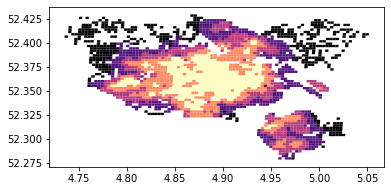

In [53]:
cities[cities['city']=='Amsterdam'].plot(column='a_log', cmap='magma', scheme='quantiles')

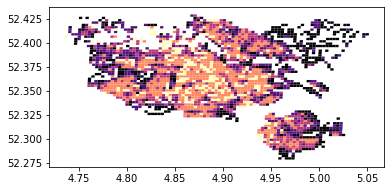

In [54]:
cities[cities['city']=='Amsterdam'].plot(column='pop_log', cmap='magma', scheme='quantiles')

In [43]:
# log population
cities['pop_log'] = np.NaN
for i in cities['city'].unique():
    # rescaled pop
    cities['pop_log'][cities['city']==i] = scaler.fit_transform(np.log(cities[['POP_2015_y']][cities['city']==i]).replace(-np.inf, 0).values).flatten()

In [197]:
# df= pd.DataFrame(columns=['No','quantity'], data=[[1,100.0],[2,102.3],[3,301.3],[4,101.3],[5,101.3],[6,120.3]])
# import scipy

# df = cities[cities['city']=='Tokyo']
# mu=df.accessibil_sc.mean()
# sig=df.accessibil_sc.std()
# df['z']=scipy.stats.mstats.zscore(df.accessibil_sc)
# df['prob']=df.sort_values('accessibil_sc')['accessibil_sc'].apply(lambda x: scipy.stats.norm(mu,sig).cdf(x))
# df['ccdf_access'] = df.sort_values('accessibil_sc')['prob'].cumsum()

In [192]:
sns.lineplot(cities[cities['city']=="Seattle"].sort_values('accessibil_sc'), x = 'accessibil_sc', y = 'ccdf_access')

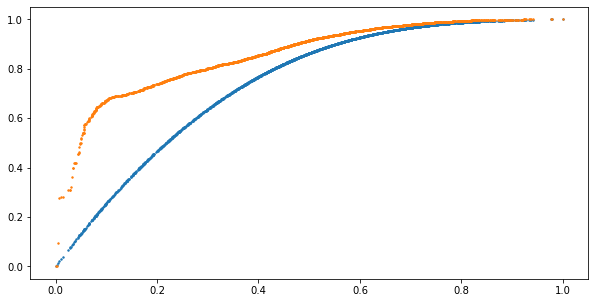

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
# ax.set(xscale="log")
plt.scatter(data=cities[cities['city']=="Amsterdam"].sort_values('a_log')[['a_log', 'ccdfa_log']], x='a_log', y='ccdfa_log', s=2)
plt.scatter(data=cities[cities['city']=="Amsterdam"].sort_values('a_log')[['a_log', 'ccdfp_log']], x='a_log', y='ccdfp_log', s=2)

In [26]:
# cities.sample(10)

In [17]:
# cities['pop_%'][cities['city']=="Edinburgh"] = (cities[['POP_2015_y']][cities['city']=="Edinburgh"].values).flatten()/np.sum(cities[['POP_2015_y']][cities['city']=="Edinburgh"]).values[0]

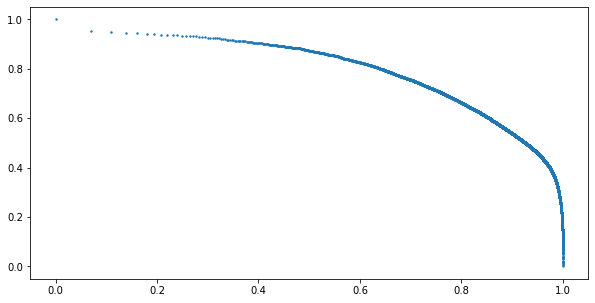

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10,5))
# ax1.set(xscale="log")
plt.scatter(data=cities[cities['city']=="London"], x="rank_a_log", y="a_log", s=2)
# plt.scatter(data=seattle, x="rank_a_r", y="a_log", s=2)

In [26]:
# sns.distplot(cities['accessibil'][cities['city']=='London'], bins=50, color='blue')
# sns.distplot(cities['POP_2015_y'][cities['city']=='London'], bins=50, color='red')
# # sns.distplot(cities['accessibil_sc_popw_r'][(cities['city']=='Cape Town')&(cities['pop_r']>0)], bins=50, color='orange')

In [27]:
# %matplotlib inline
# sns.scatterplot(data=cities[cities['city']=='Cape Town'], x="accessibil_sc", y="pop_r", s=2)

In [28]:
# sns.distplot(cities['accessibil_sc'][cities['city']=='Cape Town'], bins=50, color='blue')
# sns.distplot(cities['pop_r'][cities['city']=='Cape Town'], bins=50, color='red')
# sns.distplot(cities['accessibil_sc_popw_r'][cities['city']=='Cape Town'], bins=50, color='orange')

In [127]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(10,5))
# # ax.set(xscale="log", yscale="log")
# sns.scatterplot(data=cities[(cities['city']=='London')&(cities['accessibil_sc']>0.4)], x="accessibil_sc", y="pop_r", s=2)

C:\Users\Leonardo\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


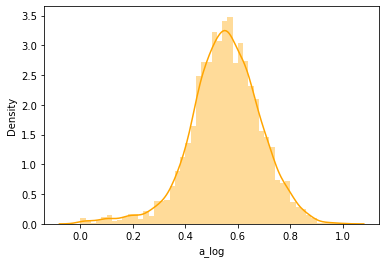

In [38]:
# fig, ax = plt.subplots(figsize=(10,5))
# # ax.set(xscale="log")
# sns.distplot(cities['accessibil_sc'][(cities['city']=='Chicago')&(cities['accessibil_sc']>0.6)], bins=20, color='blue', kde=1, norm_hist=False)
# # sns.distplot(cities['pop_r'][(cities['city']=='London')&(cities['pop_r']>0)], bins=50, color='red')
sns.distplot(cities['a_log'][cities['city']=='Buenos Aires'], bins=50, color='orange')

In [125]:
# binned_ld = cities[cities['city']=='Chicago'].groupby(pd.qcut(cities.accessibil_sc[cities['city']=='Chicago'], 20)).sum()

In [34]:
# binned_ld = cities[cities['city']=='Chicago'].groupby(pd.qcut(cities.accessibil[cities['city']=='Chicago'], 20)).sum()

In [35]:
# binned_ld['ccdf'] = binned_ld['POP_2015_y'].cumsum()

In [124]:
# fig, ax = plt.subplots(figsize=(10,5))
# binned_ld[['ccdf']].plot(kind="bar", ax = ax)
# # binned_ld[['accessibil_sc']].plot(kind="bar", ax = ax)

In [123]:
# fig, ax = plt.subplots(figsize=(10,5))
# binned_ld[['POP_2015_y']].plot(kind="bar", ax = ax)

In [ ]:
### 1) normalize each population cell: (divide each cell populaiton by the total of the city)
### 2) calculate cumsum for that column (normalized pop)
### 3) plot line (x= accessibil_sc, y=cumsum of normalized pop)


In [32]:
# sns.distplot(cities['ccdf'][cities['city']=='Chicago'], bins=20, color='blue', kde=1, norm_hist=False)

In [31]:
# %matplotlib inline
# sns.lineplot(data=cities[(cities['city']=='Tokyo')&(cities['pop_%']>0)], x="accessibil_sc", y="ccdf")

In [30]:
# sns.lineplot(data=cities[(cities['city']=='Tokyo')&(cities['pop_%']>0.00005)], x="accessibil_sc", y="ccdf")

In [29]:
# import plotly.express as px
# fig, ax = plt.subplots(figsize=(10,5))
# # ax.set(xscale="log")
# ax = sns.lineplot(data=cities[(cities['city']=='Seattle')&(cities['pop_%']>0.0005)], x="accessibil_sc", y="ccdf")

In [28]:
# import plotly.express as px
# fig, ax = plt.subplots(figsize=(10,5))
# # ax.set(xscale="log")
# ax = sns.lineplot(data=cities[(cities['city']=='Seattle')&(cities['pop_%']>0.00005)], x="accessibil_sc", y="ccdf")

In [86]:
# import plotly.express as px
# fig, ax = plt.subplots(figsize=(10,5))
# # ax.set(xscale="log")
# ax = sns.lineplot(data=cities, x="accessibil_sc", y="ccdf", hue='city')
# ax.legend(mode='expand')

### VIZ SECTION

In [7]:
import plotly.express as px

fig = px.scatter(cities.round({'a_log': 4, 'ccdfa_log': 4, 'ccdfp_log': 4, 'rank_a_log': 4}), x='a_log', y='ccdfp_log', color='Continent',
                 log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
                 template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

fig.update_layout(height = 500, width = 1000, yaxis_title="<b> log(ccdf P)",
                  xaxis_title="<b> log(A)",
                  showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
                  legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
                  legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

#plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

fig.show()

In [8]:
import plotly.express as px

fig = px.scatter(cities.round({'a_log': 4, 'ccdfa_log': 4, 'ccdfp_log': 4, 'rank_a_log': 4}), x='a_log', y='ccdfa_log', color='Continent',
                 log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
                 template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Proportion",
                  xaxis_title="<b> Accessibility Score",
                  showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
                  legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
                  legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

#plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

fig.show()

In [9]:
import plotly.express as px

fig = px.scatter(cities.round({'accessibil_sc': 4, 'ccdf_access': 8, 'ccdf': 8}), x='a_log', y='ccdf', color='Continent',
                 log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
                 template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Proportion",
                  xaxis_title="<b> Accessibility Score",
                  showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
                  legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
                  legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

#plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

fig.show()

In [10]:
import plotly.express as px

fig = px.scatter(cities.round({'accessibil_sc': 4, 'ccdf_access': 8, 'ccdf': 8}), x='a_log', y='ccdf_access', color='Continent',
                 log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
                 template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Proportion",
                  xaxis_title="<b> Accessibility Score",
                  showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
                  legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
                  legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

#plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

fig.show()

In [11]:
import plotly.express as px

fig = px.scatter(cities.round({'a_log': 4, 'ccdfa_log': 4, 'ccdfp_log': 4, 'rank_a_log': 4}), x='rank_a_log', y='a_log', color='Continent',
                 log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
                 template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

fig.update_layout(height = 500, width = 1000, yaxis_title="<b> log(access)",
                  xaxis_title="<b> log(rank)",
                  showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
                  legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
                  legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

#plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

fig.show()

In [17]:
# import plotly.express as px

# fig = px.scatter(cities.round({'accessibil_sc': 4, 'ccdf_access': 8, 'ccdf': 8})[cities['accessibil_sc']>0.01], x='a_log', y='ccdfp_log', color='Continent',
#                  log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

# fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Proportion",
#                   xaxis_title="<b> Accessibility Score",
#                   showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
#                   legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
#                   legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

In [18]:
# import plotly.express as px

# fig = px.scatter(cities.round({'accessibil_sc': 4, 'ccdf_access': 8, 'ccdf': 8})[cities['accessibil_sc']>0.01], x='a_log', y='ccdfp_log', color='Continent',
#                  log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

# fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Proportion",
#                   xaxis_title="<b> Accessibility Score",
#                   showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
#                   legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
#                   legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

In [19]:
# import plotly.express as px

# fig = px.scatter(cities.round({'accessibil_sc': 4, 'ccdf_access': 8, 'ccdf': 8})[cities['accessibil_sc']>0.01], x='a_log', y='ccdfp_log', color='Continent',
#                  log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

# fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Proportion",
#                   xaxis_title="<b> Accessibility Score",
#                   showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
#                   legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
#                   legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

In [20]:
# import plotly.express as px

# fig = px.scatter(cities.round({'accessibil_sc': 4, 'ccdf_access': 8, 'ccdf': 8})[cities['accessibil_sc']>0.01], x='accessibil_sc', y='ccdf', color='Continent',
#                  log_x=True, log_y=True, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

# fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Proportion",
#                   xaxis_title="<b> Accessibility Score",
#                   showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
#                   legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
#                   legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

In [30]:
# import plotly.express as px

# fig = px.scatter(cities.round({'accessibil': 1, 'accessibil_sc': 4, 'ccdf': 4})[cities['accessibil']>0.01], x='accessibil_sc', y='ccdf', color='Continent',
#                  log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

# fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Density",
#                   xaxis_title="<b> Accessibility Score",
#                   showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
#                   legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
#                   legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

In [26]:
# import plotly.express as px

# fig = px.scatter(cities[cities['accessibil']>0.01], x='accessibil_sc', y='ccdf', color='Continent',
#                  log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

# fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Density",
#                   xaxis_title="<b> Accessibility Score",
#                   showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
#                   legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
#                   legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

In [25]:
# import plotly.express as px

# fig = px.scatter(cities[(cities['accessibil_sc'])&(cities['city']=="Tokyo")], x='accessibil_sc', y='ccdf', color='Continent',
#                  log_x=False, log_y=True, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

# fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Proportion",
#                   xaxis_title="<b> Accessibility Score",
#                   showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
#                   legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
#                   legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

In [24]:
# import plotly.express as px

# fig = px.scatter(cities[(cities['accessibil_sc']>0.01)&(cities['city']=="Tokyo")], x='accessibil_sc', y='ccdf', color='Continent',
#                  log_x=True, log_y=True, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

# fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Proportion",
#                   xaxis_title="<b> Accessibility Score",
#                   showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
#                   legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
#                   legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

In [129]:
# import plotly.express as px

# fig = px.scatter(cities, x='accessibil_sc', y='pop_%', color='Continent',
#                  log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

# fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Density",
#                   xaxis_title="<b> Accessibility Score",
#                   showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
#                   legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
#                   legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

In [ ]:
# median access vs exponent of each city, size of each dot is total pop of the whole city

In [45]:
# from sklearn.model_selection import train_test_split
# city = "Tokyo"

# X = cities[cities['city']==city]['accessibil_sc']
# y = cities[cities['city']==city]['ccdf']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [210]:
# model = np.polyfit(np.log1p(X_train), np.log1p(y_train), deg=1)

# print("intercept:", model[1].round(2))
# print("slope:", model[0].round(2))

In [5]:
cities.head()

,city,POP_2015_y,active_liv,community_,education,food_choic,health_wel,mobility,nightlife,y,...,pop_%,ccdf,ccdf_access,a_log,ccdfa_log,ccdfp_log,rank_a,rank_a_log,Continent,geometry
0,Zurich,468.351227,63.053286,86.134357,50.645381,55.759666,123.876309,64.805548,70.472857,47.386764,...,0.001189,1.000000,0.877474,1.000000,1.000000,1.000000,1.0,0.000000,Europe,"POLYGON ((8.52792 47.38557, 8.52816 47.38791, ..."
1,Zurich,489.092712,76.890100,120.004829,130.543286,54.991929,88.553486,57.419628,63.030514,47.370499,...,0.001242,0.998811,0.874236,0.974186,0.999713,0.999817,2.0,0.095902,Europe,"POLYGON ((8.54851 47.36917, 8.54875 47.37152, ..."
2,Zurich,319.946716,52.465406,83.130423,153.086765,75.713407,75.096422,56.953453,115.623984,47.365169,...,0.000812,0.997569,0.872973,0.964843,0.999600,0.999626,3.0,0.152001,Europe,"POLYGON ((8.52895 47.36449, 8.52919 47.36683, ..."
3,Zurich,489.092712,82.481237,135.023609,107.392900,35.986227,87.228009,95.130309,79.947509,47.384331,...,0.001242,0.996756,0.872133,0.958841,0.999526,0.999501,4.0,0.191804,Europe,"POLYGON ((8.53086 47.38322, 8.53110 47.38557, ..."
4,Zurich,489.092712,84.515859,181.791408,159.842563,45.763986,59.456929,62.186662,113.795423,47.367602,...,0.001242,0.995515,0.869665,0.942049,0.999306,0.999309,5.0,0.222678,Europe,"POLYGON ((8.54509 47.36683, 8.54533 47.36917, ..."


In [6]:
cities[cities['city']=="Chicago"]['a_log']

297550    1.000000e+00
297551    9.806676e-01
297552    9.771824e-01
297553    9.518695e-01
297554    9.367765e-01
              ...     
306000    1.218077e-02
306001    1.001914e-02
306002    1.900564e-03
306003    8.233333e-04
306004   -2.220446e-16
Name: a_log, Length: 8455, dtype: float64

### AUC Population Analysis

In [39]:
import numpy as np
from sklearn.metrics import auc
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

city_names = []
areas_A = []
areas_P = []
areas_AP = []

for i in cities['city'].unique():
    
    xx = cities[cities['city']==i]['a_log']
    yyA = cities[cities['city']==i]['ccdfa_log']
    yyP = cities[cities['city']==i]['ccdfp_log']

    area_A = auc(xx,yyA)
    area_P = auc(xx,yyP)
    area_AP = area_A-area_P
    
    city_names.append(i)
    areas_A.append(area_A)
    areas_P.append(area_P)
    areas_AP.append(area_AP)
    
    data = {"city": city_names, "areas_A": areas_A, "areas_P": areas_P, "areas_AP": areas_AP}
    results = pd.DataFrame(data)

    print(i)
#     print('computed AUC of ccdfA using sklearn.metrics.auc: {}'.format(area_A))
#     print('computed AUC of ccdfP using sklearn.metrics.auc: {}'.format(area_P))
    print('The area between the two curves is: {}'.format(area_AP))
# print('computed AUC using np.trapz: {}'.format(np.trapz(yy, dx = dx)))

Zurich
The area between the two curves is: 0.01793131195021147
Warsaw
The area between the two curves is: -0.10907103593655465
Vancouver
The area between the two curves is: 0.008752369072156707
Tokyo
The area between the two curves is: -0.009649740383296246
The Hague
The area between the two curves is: -0.05113691319870661
Taipei
The area between the two curves is: -0.043752748547479126
Sydney
The area between the two curves is: -0.010913987645504664
Stockholm
The area between the two curves is: 0.024481804147449826
Singapore
The area between the two curves is: -0.023805100786119304
Shanghai
The area between the two curves is: -0.04911547125286564
Seoul
The area between the two curves is: -0.016252426153963828
Seattle
The area between the two curves is: -0.06476630111364656
Santiago
The area between the two curves is: -0.01566131774341817
San Francisco
The area between the two curves is: -0.034771113960046285
Rome
The area between the two curves is: -0.08055814751859491
Rio de Janeiro


In [40]:
results.to_csv("data/processed/cities_auc.csv")

In [213]:
city_names = []
intercepts_ap = []
slopes_ap = []
intercepts_aa = []
slopes_aa = []

for i in cities['city'].unique():
    
    # access and pop ccdf
    X = cities[cities['city']==i]['accessibil_sc']
    y_pop = cities[cities['city']==i]['ccdf']

    X_train, X_test, y_train, y_test = train_test_split(X, y_pop, test_size=0.33, random_state=42)
    model = np.polyfit(np.log1p(X_train), np.log1p(y_train), deg=1)
    
    city_names.append(i)
    intercepts_ap.append(model[1])
    slopes_ap.append(model[0])
    
    # access and pop ccdf
    y_acc = cities[cities['city']==i]['ccdf_access']

    X_train, X_test, y_train, y_test = train_test_split(X, y_acc, test_size=0.33, random_state=42)
    model = np.polyfit(np.log1p(X_train), np.log1p(y_train), deg=1)
    
    intercepts_aa.append(model[1])
    slopes_aa.append(model[0])
    
#     print(i)
#     print("intercept:", model[1].round(2))
#     print("slope:", model[0].round(2))

data = {"city": city_names, "intercept_ap": intercepts_ap, "slope_ap": slopes_ap, "intercept_aa": intercepts_aa, "slope_aa": slopes_aa}
results = pd.DataFrame(data)

In [215]:
cities_exp = results.merge(cities[['POP_2015_y', 'accessibil_sc', 'accessibil', 'Continent', 'city']].groupby(by ='city').agg({'POP_2015_y': 'sum', 'accessibil_sc': 'median', 'accessibil': 'median'}), on='city')
cities_exp = pd.merge(cities_exp, cities[['Continent', 'city']], on='city', how='left').groupby(by=['city', 'Continent']).median().reset_index()

In [3]:
# cities_exp.to_csv("data/processed/cities_exp.csv")
cities_exp = pd.read_csv("data/processed/cities_exp.csv")

In [74]:
# cities[(cities['accessibil_sc']>0.01)&(cities['city']=="Tokyo")|(cities['city']=="Berlin")|(cities['city']=="Budapest")|(cities['city']=="London")]

In [107]:
# import plotly.express as px

# fig = px.scatter(cities.round({'accessibil': 1, 'accessibil_sc': 4, 'ccdf': 4})[(cities['accessibil_sc']>0.01)&((cities['city']=="Tokyo")|(cities['city']=="Berlin")|(cities['city']=="Seattle")|(cities['city']=="London"))]
#                  , x='accessibil_sc', y='ccdf', color='city',
#                  log_x=True, log_y=True, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

# fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Proportion",
#                   xaxis_title="<b> Accessibility Score",
#                   showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
#                   legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
#                   legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

In [106]:
# import plotly.express as px

# fig = px.scatter(cities.round({'accessibil_sc': 4, 'ccdf_access': 8, 'ccdf': 8})[(cities['accessibil_sc']>0.01)&((cities['city']=="Tokyo")|(cities['city']=="Berlin")|(cities['city']=="Seattle")|(cities['city']=="London"))]
#                  , x='accessibil_sc', y='ccdf_access', color='city',
#                  log_x=True, log_y=True, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

# fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Probability of Accessibility",
#                   xaxis_title="<b> Accessibility Score",
#                   showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
#                   legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
#                   legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

In [4]:
cities_exp.sort_values('slope_ap', ascending=False)

In [117]:
# import plotly.express as px

# fig = px.scatter(cities_exp, x='accessibil_sc', y='slope', color='Continent',
#                  log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white', hover_data=["city", "accessibil_sc", "ccdf"]).update_traces(marker=dict(size=2.5))

# fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Cumulative Population Proportion",
#                   xaxis_title="<b> Accessibility Score",
#                   showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
#                   legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
#                   legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

In [6]:
# fig, ax = plt.subplots(figsize=(15,10))
# ax = sns.scatterplot(data=cities_exp, x="accessibil_sc", y="slope", size='POP_2015_y', hue = "Continent")

In [5]:
# fig, ax = plt.subplots(figsize=(15,10))
# ax = sns.scatterplot(data=cities_exp, x="accessibil_sc", y="POP_2015_y", size='slope', hue = "Continent")

In [4]:
# fig, ax = plt.subplots(figsize=(15,10))
# ax = sns.scatterplot(data=cities_exp, x="slope", y="POP_2015_y", size='accessibil_sc', hue = "Continent")

In [3]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# fig, ax = plt.subplots(figsize=(15,10))
# ax = sns.scatterplot(data=cities_exp, x="slope_aa", y="slope_ap", size='POP_2015_y', hue = "Continent")

In [2]:
# import plotly.express as px
# fig = px.scatter(cities_exp, x="slope_aa", y="slope_ap", color='Continent', size='accessibil_sc',
#                  color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white', hover_data=["city", "accessibil_sc", "slope_ap", "slope_aa"])

# fig.update_layout(height = 500, width = 1000, yaxis_title="<b> Slope Access/Pop Law",
#                   xaxis_title="<b> Slope Access Law",
#                   showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
#                   legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
#                   legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

### Story
1) Law: Pure with all the cells
- Explain that law is interesting, but its possible that it is because there are a number of cells with very low populations
- Color by continent
</br>
2) Beyond the Law:
- Now we remove all the cells below a population percentage threshold (e.g. 0.05% of the city population)
- we show the disparity in access by population in cities: how the same amount of people have drastically different access scores

In [ ]:
# 1) 1 figure of 10 NA cities (y == ccdf pop, x=access, log scale y and x with coefficient and slope), twice: once for access ccdf pop, twice for ccdf access --> color by city
# 2) scatterplot: slope from access law (pdf and access) vs slope of access/pop law color/size by population --> grey dots but color NA cities
# 3) access/pop law without exponents + access law plot (square plots) (12px) only for 10 NA cities, same thing in supp with all cities --> all lines grey and color 3 med high low cities

In [93]:
# sns.barplot(data=binned_ld, x='bin', y="POP_2015_y", s=2)

In [38]:
# sns.distplot(cities['accessibil_cap'][(cities['city']=='Tokyo')&(cities['accessibil_cap']<400)].replace([np.inf, -np.inf], np.NaN), bins=100, color='blue')
# # sns.distplot(cities['accessibil_sc_popw_r'][cities['city']=='London'], bins=50, color='orange')

In [7]:
# cities.to_file('data/interim/accessibility/new/poly/hex/cities_final_popgrid.json', index=False, driver = 'GeoJSON')

In [12]:
cities[cities['Continent'] == "North America"].to_csv('data/interim/accessibility/new/poly/hex/cities_NA_popgrid.csv')

In [92]:
cities['accessibil'] = cities['accessibil'].astype('int')

In [36]:
# cities.round({'accessibil_sc': 4, 'ccdf_access': 8, 'ccdf': 8})[['city', 'accessibil', 'accessibil_sc', "ccdf_access", 'ccdf']].to_csv('data/interim/accessibility/new/poly/hex/cities_scaling.csv')

In [44]:
cities.round({'a_log': 4, 'pop_log': 4, 'ccdfa_log': 4, 'ccdfp_log': 4, 'rank_a_log': 4})[['city', 'a_log', 'pop_log', "ccdfa_log", 'ccdfp_log', "rank_a_log"]].to_csv('data/processed/cities_scaling.csv')

In [ ]:
# cities.round({'a_log': 4, 'pop_log': 4, 'ccdfa_log': 4, 'ccdfp_log': 4, 'rank_a_log': 4})[['city', 'a_log', 'pop_log', "ccdfa_log", 'ccdfp_log', "rank_a_log"]].to_file('data/interim/accessibility/new/poly/hex/cities_final_popgrid.json', index=False, driver = 'GeoJSON')

In [95]:
cities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 396924 entries, 0 to 396923
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   city                  396924 non-null  object  
 1   POP_2015_y            396924 non-null  float64 
 2   active_liv            396924 non-null  float64 
 3   community_            396924 non-null  float64 
 4   education             396924 non-null  float64 
 5   food_choic            396924 non-null  float64 
 6   health_wel            396924 non-null  float64 
 7   mobility              396924 non-null  float64 
 8   nightlife             396924 non-null  float64 
 9   y                     396924 non-null  float64 
 10  x                     396924 non-null  float64 
 11  pop_r                 396924 non-null  float64 
 12  accessibil            396924 non-null  int32   
 13  accessibil_sc         396924 non-null  float64 
 14  accessibil_sc_popw    396924